# Importing the libararies 

In [280]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

# Functions for image processing and visualizing  

In [283]:
#to decode the image 

def load_image(image_path, image_size=(512, 512)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [284]:

def visualization(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 12) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])  
        plt.show()

# Loading the Images 

In [285]:
original_image = load_image("PN63-900x600 (1).jpg")
colored_image = load_image("WhatsApp Image 2022-09-20 at 23.58.18.jpeg")

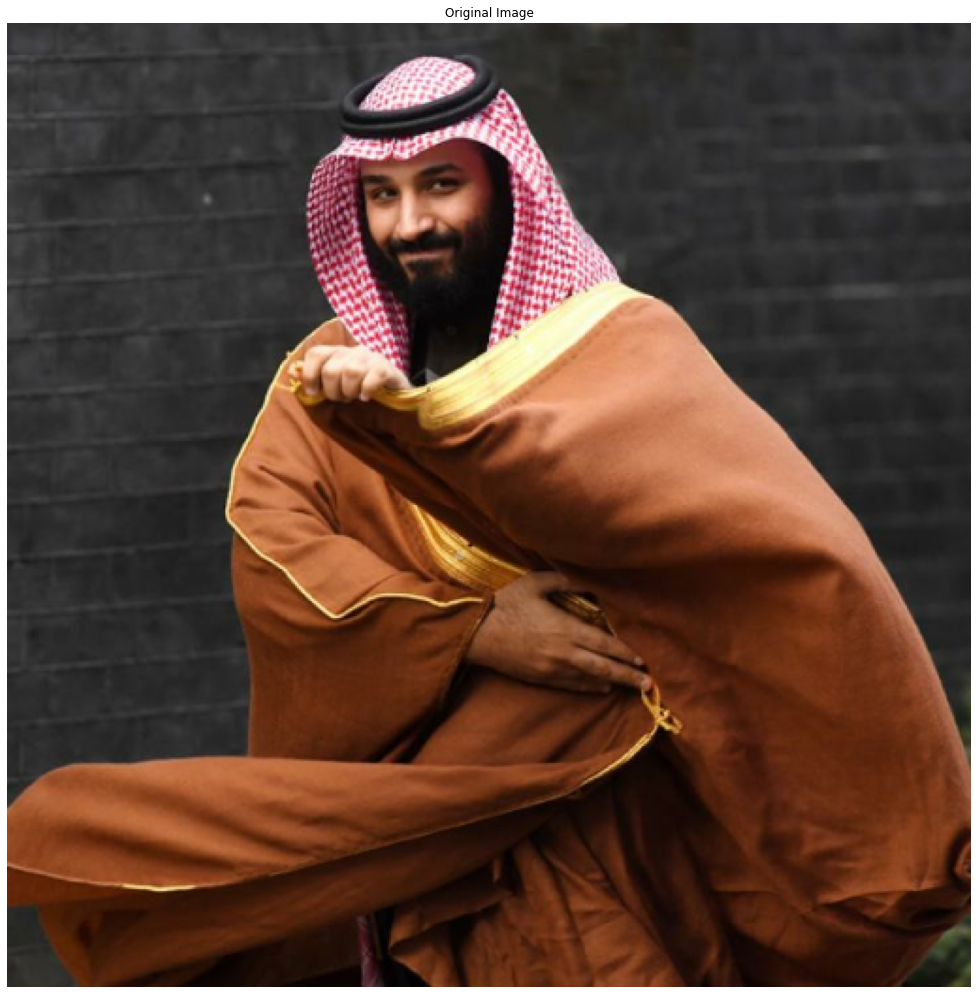

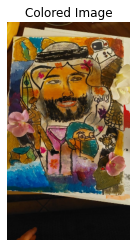

In [292]:
style_image = tf.nn.avg_pool(colored_image, ksize=[1,1], strides=[3,3], padding='VALID')

visualization([original_image,colored_image], ['Original Image', 'Colored Image'])

# Model

In [293]:
import tensorflow_hub as tf_hub

stylize_model = tf_hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [294]:
results = stylize_model(tf.constant(original_image), tf.constant(colored_image))
stylized_photo = results[0]

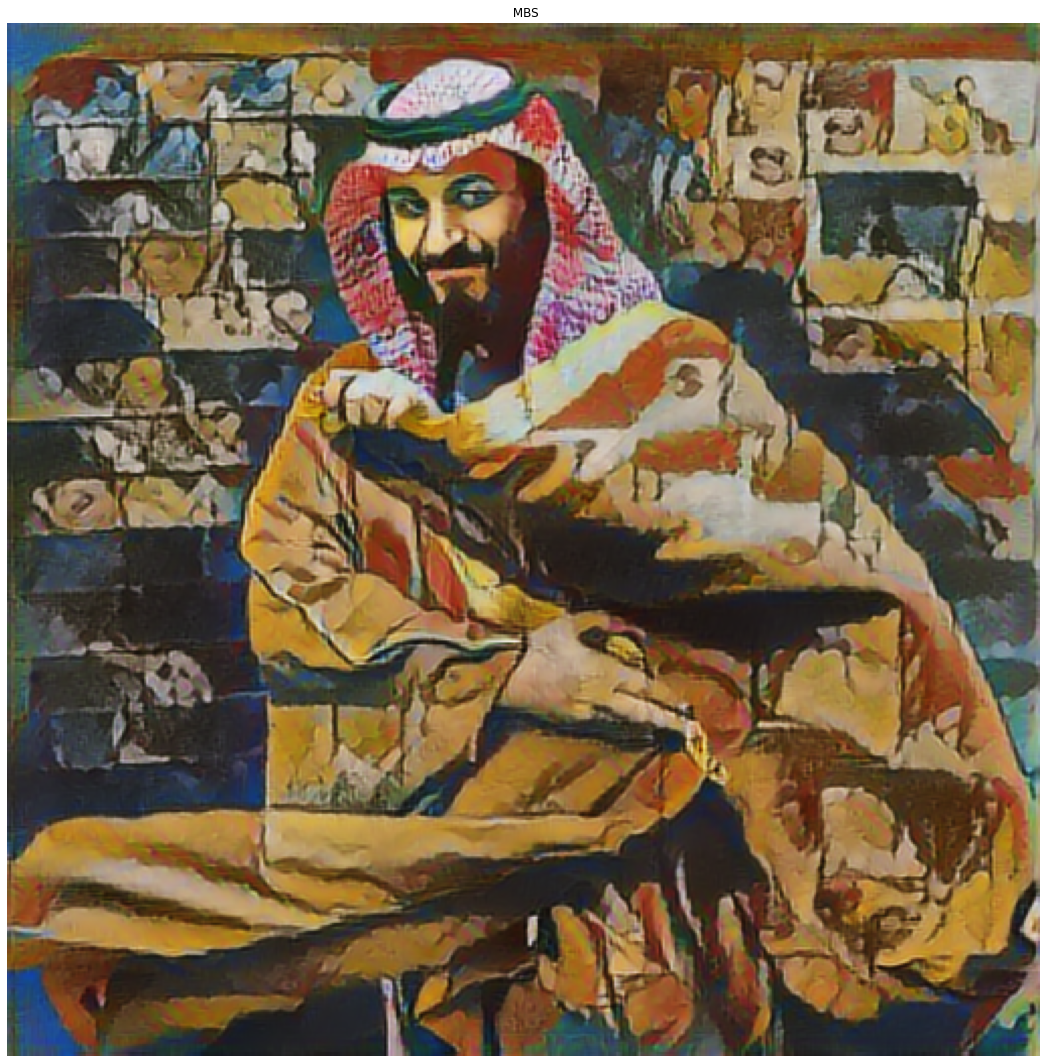

In [299]:
visualization([ stylized_photo], titles=[' MBS'])

In [300]:
def export_image(tf_img):
    tf_img = tf_img*255
    tf_img = np.array(tf_img, dtype=np.uint8)
    if np.ndim(tf_img)>3:
        assert tf_img.shape[0] == 1
        img = tf_img[0]
    return PIL.Image.fromarray(img)

In [301]:
export_image(stylized_photo).save("mbs.png")

# Reference:
    
    https://towardsdatascience.com/python-for-art-fast-neural-style-transfer-using-tensorflow-2-d5e7662061be
        